# Основы работы с библиотекой `matplotlib`

С помощью `matplotlib` можно строить различные графики. 

Построим простой график для визуализации данных в двух списках.

In [1]:
import matplotlib.pyplot as plt # Импортируем модуль pyplot из библиотеки matplotlib
# питоновская "магическая" строчка для того, чтобы графики отображались прямо в ipynb-файле
% matplotlib inline 

UsageError: Line magic function `%` not found.


In [2]:
X = [-2, -0.5, 0, 2, 5, 8, 9, 10] # Создадим два списка
Y = [4, 0.25, 0, 4, 25, 64, 81, 100]

Построим график.

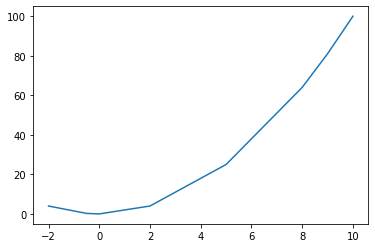

In [3]:
plt.plot(X,Y)

Как можно заметить, в списке `Y` сохранены элементы списка `X`, возведенные в квадрат. Однако наш график не похож на ветвь параболы, он угловатый. Это нормально, потому что в списках у нас всего по 8 элементов, то есть, всего 8 точек на графике соединяются линиями. Если бы точек было больше, график был бы более гладким. 
Воспользуемся функцией `linspace` из библиотеки `numpy`.

In [4]:
import numpy as np

In [5]:
x = np.linspace(-2, 10, 100) # 100 точек
x

array([-2.        , -1.87878788, -1.75757576, -1.63636364, -1.51515152,
       -1.39393939, -1.27272727, -1.15151515, -1.03030303, -0.90909091,
       -0.78787879, -0.66666667, -0.54545455, -0.42424242, -0.3030303 ,
       -0.18181818, -0.06060606,  0.06060606,  0.18181818,  0.3030303 ,
        0.42424242,  0.54545455,  0.66666667,  0.78787879,  0.90909091,
        1.03030303,  1.15151515,  1.27272727,  1.39393939,  1.51515152,
        1.63636364,  1.75757576,  1.87878788,  2.        ,  2.12121212,
        2.24242424,  2.36363636,  2.48484848,  2.60606061,  2.72727273,
        2.84848485,  2.96969697,  3.09090909,  3.21212121,  3.33333333,
        3.45454545,  3.57575758,  3.6969697 ,  3.81818182,  3.93939394,
        4.06060606,  4.18181818,  4.3030303 ,  4.42424242,  4.54545455,
        4.66666667,  4.78787879,  4.90909091,  5.03030303,  5.15151515,
        5.27272727,  5.39393939,  5.51515152,  5.63636364,  5.75757576,
        5.87878788,  6.        ,  6.12121212,  6.24242424,  6.36

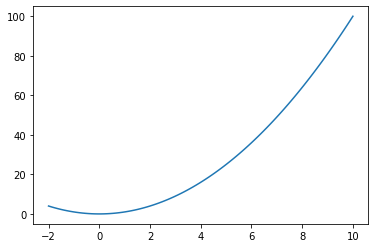

In [6]:
plt.plot(x, x**2)

Так график больше похож на параболу. 

Изобразим ее полностью, определенную на участке от -10 до 10.

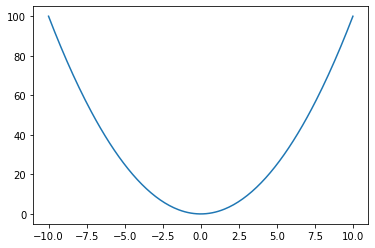

In [7]:
x = np.linspace(-10, 10, 200)
plt.plot(x, x**2)

Поменяем цвет линии по умолчанию на какой-нибудь другой.

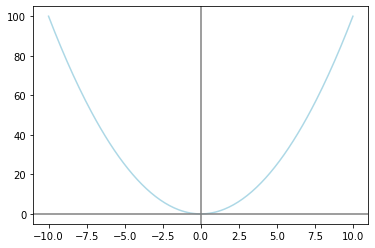

In [8]:
plt.plot(x, x**2, 'lightblue')

plt.axhline(0, color='grey') # оси
plt.axvline(0, color='grey')

Список цветов в Python см. [здесь](https://matplotlib.org/users/colors.html). 

Теперь изменим тип линии. По умолчанию используется сплошная линия, но ее можно заменить на пунктирную и т.п.

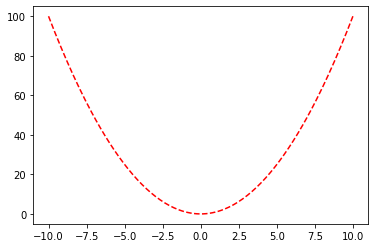

In [9]:
plt.plot(x, x**2, 'red', linestyle = '--')

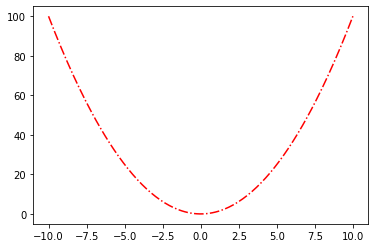

In [10]:
plt.plot(x, x**2, 'red', linestyle = '-.')

Список всех типов линий см. [здесь](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html). 

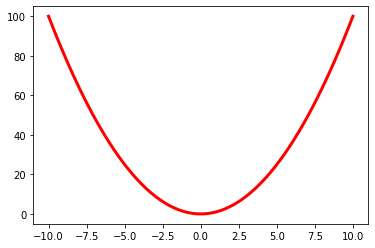

In [11]:
plt.plot(x, x**2, 'red', linewidth = 3) # изменим толщину линии

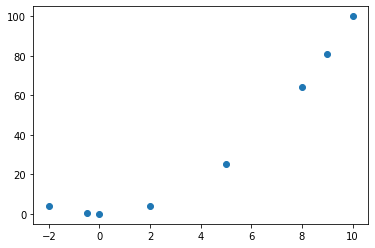

In [12]:
plt.scatter(X, Y) # построим график, состоящий только из точек (можно считать диаграммой рассеяния)

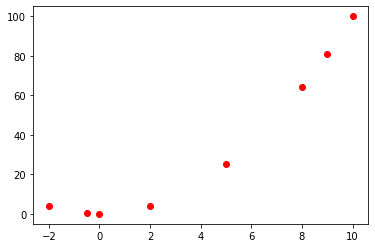

In [13]:
plt.scatter(X, Y, color ='red', marker = 'o') # меняем цвет точек и тип точек (тип маркера) одновременно

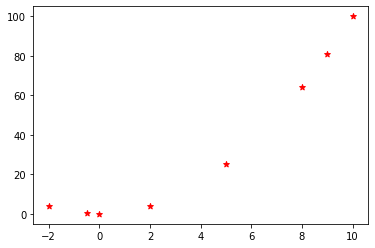

In [14]:
plt.scatter(X, Y, color ='red', marker = '*')

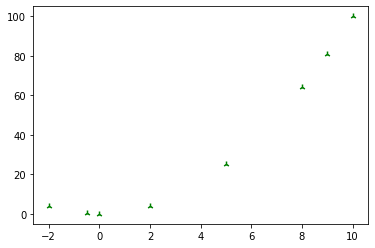

In [15]:
plt.scatter(X, Y, color ='green', marker = '2')

Список маркеров смотри [здесь](https://matplotlib.org/api/markers_api.html).

Если бы все строки кода со `scatter()` были в одной ячейке, то графики бы просто накладывались друг на друга.

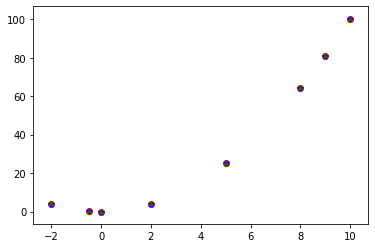

In [16]:
plt.scatter(X, Y, color ='red', marker = 'o')
plt.scatter(X, Y, color ='blue', marker = '*')
plt.scatter(X, Y, color ='green', marker = '2')

Если присмотреться, то на красных точках можно увидеть синие звездочки и зеленые треугольники. Чтобы такого не происходило (например, если вы создаете и сохраняете графики в цикле в пределах одной ячейки), нужно добавить строку с функцией `clf()`, которая очищает координатную плоскость для следующего графика (*clf* ‒ от *clear figure*).

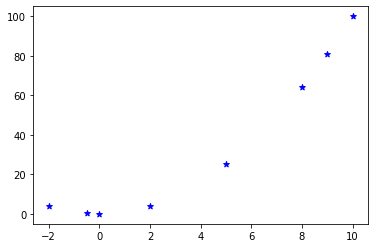

In [17]:
plt.scatter(X, Y, color ='red', marker = 'o')
plt.clf()
plt.scatter(X, Y, color ='blue', marker = '*')

На плоскости представлен только последний график с синими звездочками, красные точки от первого графика был стерты с помощью `clf()`.

При построении графиков стоит иметь в виду, что функция `plot()` всегда соединяет точки, причем последовательно, в том порядке, в котором они следуют в списках или массивах. Из-за этой особенности, допустив ошибку, связанную с заданием неверной области определения функции, можно получить некорректные графики. Построим для примера гиперболу.

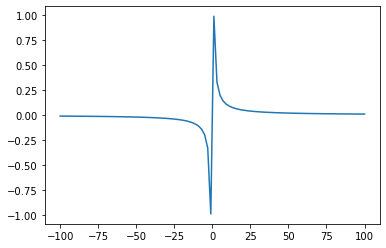

In [18]:
x = np.linspace(-100, 100, 100)
y = 1/x
plt.plot(x, y)

Полученный график не гипербола. Как известно, в точке $x=0$ график уходит на бесконечность, линия при $x=0$ отсутствует. Избавимся от нее, построив график "по кусочкам".

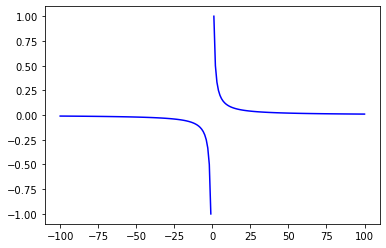

In [19]:
x1 = np.linspace(-100, -1, 100) # x < 0
y1 = 1/x1

x2 = np.linspace(1, 100, 100) # x > 0
y2 = 1/x2

plt.plot(x1, y1, 'blue')
plt.plot(x2, y2, 'blue')

Далее построим целый рисунок (*figure*), состоящий сразу из нескольких графиков (подграфиков). Построим разные типы функций: $y=x^2$, $y=x^3$, $y=e^x$ и $y=|x|$. Сначала создадим соответствующие массивы значений:

In [21]:
x = np.linspace(-100, 100, 100)
y = x ** 2
z = x ** 3
r = np.exp(x)
m = abs(x)

Создадим рисунок (*figure*):

In [22]:
plt.figure(1)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

А теперь будем добавлять в него графики, указывая их расположение. В функции `subplot()` указывается число. Первые две цифры ‒ это число графиков в строке и столбце (здесь 2 на 2, поэтому `22`). Последняя цифра ‒ это положение графика: левый верхний угол (`1`), правый верхний угол (`2`), левый нижний угол (`3`), правый нижний угол (`4`).

Text(0.5, 1.0, 'abs')

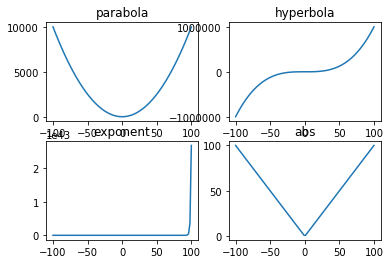

In [23]:
plt.subplot(221)
plt.plot(x, y) # x^2
plt.title('parabola')


plt.subplot(222)
plt.plot(x, z) # x^3
plt.title('hyperbola')


plt.subplot(223)
plt.plot(x, r) # e^x
plt.title('exponent')


plt.subplot(224)
plt.plot(x, m) # |x|
plt.title('abs')


Строка `plt.grid(True)` нужна для того, чтобы на графиках были добавлены линии разметки, привычные нам "клеточки", которые позволяют удобным образом определять координаты точек на графике.

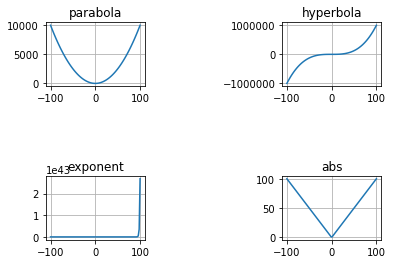

In [24]:
plt.subplot(331)
plt.plot(x, y) # x^2
plt.title('parabola')
plt.grid(True)

plt.subplot(333)
plt.plot(x, z) # x^3
plt.title('hyperbola')
plt.grid(True)

plt.subplot(337)
plt.plot(x, r) # e^x
plt.title('exponent')
plt.grid(True)

plt.subplot(339)
plt.plot(x, m) # |x|
plt.title('abs')
plt.grid(True)

Сохраним график в файл.

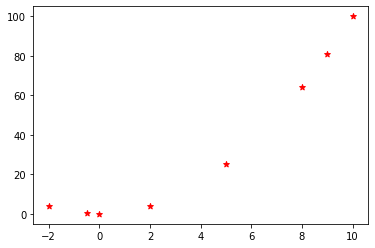

In [25]:
plt.figure(1)
plt.scatter(X, Y, color ='red', marker = '*')
plt.savefig('MyScatter.png') # ищем файл в рабочей папке (рядом с текущим ipynb-файлом)

### Добавление легенды для лучшего отображения информации

#### Отображение легенды

Для отображения легенды на графике используется функция legend(). Чтобы самостоятельно указать текстовую метку для
отображаемых данных нужно указать список значений.

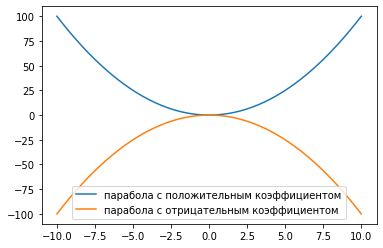

In [26]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 10 , 200)
plt.plot(x, x**2)
plt.plot(x, - x**2)
plt.legend(["парабола с положительным коэффициентом", "парабола с отрицательным коэффициентом"])

Также можно просто указать метки в функциях построения графиков (параметр label) и вызвать legend().

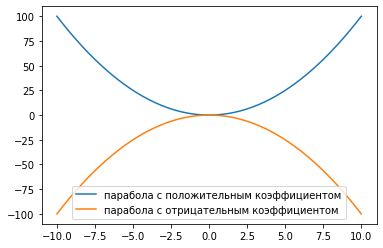

In [27]:
x = np.linspace(-10, 10 , 200)
plt.plot(x, x**2, label = 'парабола с положительным коэффициентом')
plt.plot(x, - x**2, label = 'парабола с отрицательным коэффициентом')
plt.legend()

Также можно в легенде можно вручную указать соответствие линий и меток.

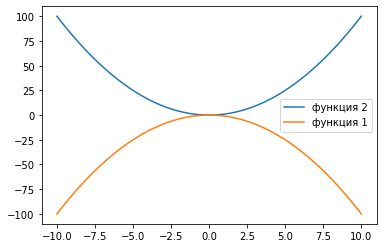

In [28]:
x = np.linspace(-10, 10 , 200)
fx, = plt.plot(x, x**2)
gx, = plt.plot(x, - x**2)
plt.legend((fx, gx), ['функция 2', 'функция 1'])

#### Расположение легенды

До этого легенда располагалась в разных местах графика. Чтобы задать расположение, используется параметр loc, ему можно присваивать как значения кода расположения, так и строковое описание:
- 'best' = 0
- 'upper right' = 1
- 'upper left' = 2
- 'lower left' = 3
- 'lower right' = 4
- 'right' = 5
- 'center left' = 6
- 'center right' = 7
- 'lower center' = 8
- 'upper center' = 9
- 'center' = 10


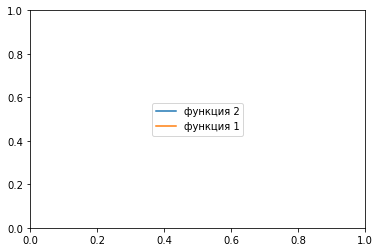

In [29]:
plt.legend((fx, gx),['функция 2', 'функция 1'], loc = 10)

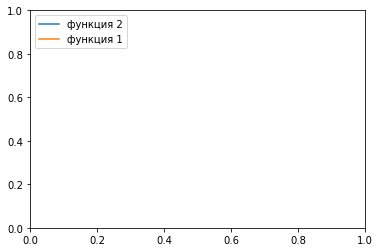

In [30]:
plt.legend((fx, gx),['функция 2', 'функция 1'], loc ='upper left')

#### У легенды можно задать ещё параметры:
- fontsize (размер шрифта надписи)
- frameon (отображение рамки True/False)
- framealpha (прозрачность легенды)
- facecolor (цвет заливки рамки)
- edgecolor (цвет контура рамки)
- title (текст заголовка)
- title_fontsize (размер шрифта заголовка)

Легенда, у которой размер шрифта надписей = 16, голубая заливка и красный контур у рамки, заголовок "Функции":

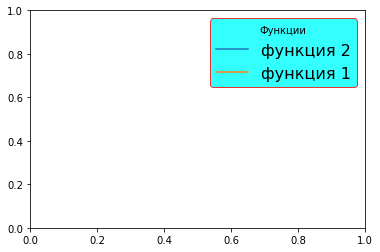

In [31]:
plt.legend((fx, gx),['функция 2', 'функция 1'], fontsize = 16, facecolor='aqua', edgecolor='r', title='Функции')

### Построение диаграммы

#### Для вывода диаграммы используется функция bar()

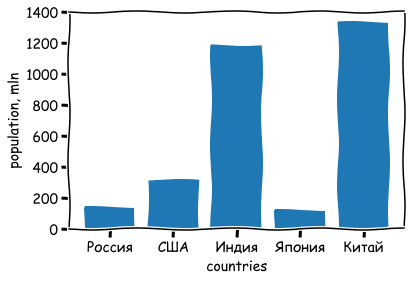

In [32]:
import matplotlib.pyplot as plt
countries = ["Россия", "США", "Индия", "Япония", "Китай"]
population = [146, 318, 1187, 127, 1336]
with plt.xkcd():  #эффект рисования от руки
    plt.bar(countries, population)
    plt.xlabel("countries")
    plt.ylabel("population, mln")
 

#### Если изменим bar на barh, получим горизонтальную диаграмму:

Text(0.5, 0, 'population, mln')

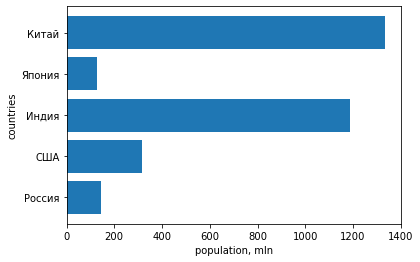

In [33]:
plt.barh(countries, population)
#оси x и y поменялись местами
plt.ylabel("countries")
plt.xlabel("population, mln")

#### В bar() и barh() можно задать дополнительные параметры, например:
- color, т.е. цвет столбцов диаграммы
- edgecolor, т.е. цвет границы столбцов
- linewidth, т.е. ширина границы
- tick_label, т.е. метки для столбца

Ниже пример диаграммы, у которой столбцы синего цвета, чёрная граница столбцов с шириной границы = 5

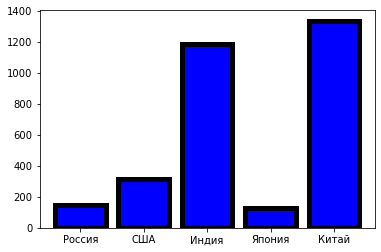

In [34]:
plt.bar(countries, population, color = "b", edgecolor = "k", linewidth = 5)
plt.show()

#### Для построения круговых диаграмм в Matplotlib используется функция pie()

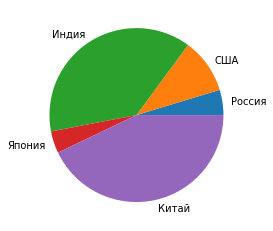

In [35]:
plt.pie(population, labels = countries)
plt.show()

#### Настройка уровня выдвижения секторов

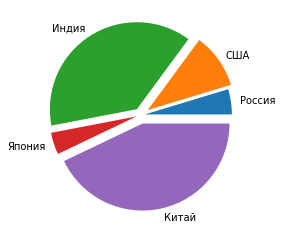

In [36]:
explode = [0.05, 0.1, 0.08, 0.05, 0.1] 
plt.pie(population, labels = countries, explode=explode)
plt.show()

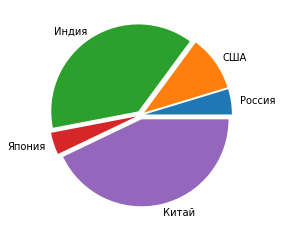

In [37]:
explode = [0.05 for i in range(len(population))]
plt.pie(population, labels = countries, explode=explode)
plt.show()

#### Настройка цвета для определённого сектора и добавление тени 
Чтобы нужный сектор сделать определённого цвета, создаётся список со значениями цветов. Параметру colors присваивается этот список.
При необходимости можно добавить тень, установив значение shadow=True:

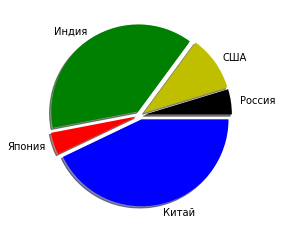

In [38]:
colors = ['k', 'y','g','r','b']
plt.pie(population, labels = countries, explode=explode, colors = colors, shadow=True)
plt.show()

### Построение в полярной системе координат
За построение в определённой системе координат отвечает параметр projection.
В matplotlib поддерживаются следующие проекции: 
- 'aitoff', 
- 'hammer', 
- 'lambert', 
- 'mollweide', 
- 'polar', 
- 'rectilinear'.

При построении в полярной системе координат вместо projection = 'polar' можно писать polar=True.

Ниже приведён пример графика функции 5*cos(3*φ + 4):

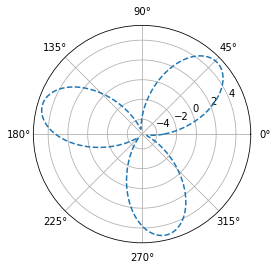

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(projection = 'polar')             # задаём полярную систему координат

phi = np.arange(0, 2*np.pi, 0.01)   # угол phi - массив от от 0 до 2*pi с шагом 0.01
ro = 5*np.cos(3*phi + 4)            # уравнение функции
plt.plot(phi, ro, linestyle = '--')  
plt.show()

Также в полярной системе кординат можно строить с помощью polar():

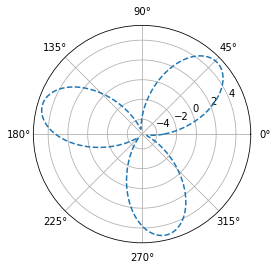

In [40]:
import matplotlib.pyplot as plt
import numpy as np
phi = np.arange(0, 2*np.pi, 0.01)   # угол phi - массив от от 0 до 2*pi с шагом 0.01
plt.polar(phi, 5*np.cos(3*phi + 4), linestyle = '--')
plt.show()

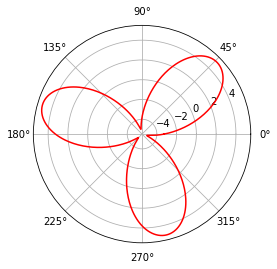

In [41]:
phi = np.arange(0, 2*np.pi, 0.01)
plt.polar(phi, 5*np.cos(3*phi + 4), color = 'r')
plt.show()

#### Изменение цветовой карты

dict_keys(['magma', 'magma_r', 'inferno', 'inferno_r', 'plasma', 'plasma_r', 'viridis', 'viridis_r', 'cividis', 'cividis_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r'])


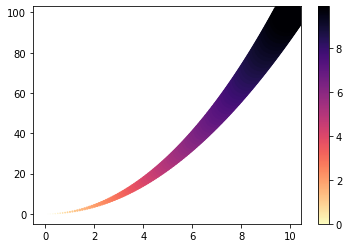

In [42]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0, 10, 0.1)
y = x**2
area = x**3
colors = x 
print(plt.cm.cmaps_listed.keys())  #смотрим возможные значения для цветовой карты
plt.scatter(x, y, c = colors, s = area, cmap = plt.cm.magma_r) #указываем название цветовой карты после plt.cm.
plt.colorbar() # добавление цветовой панели
plt.show()

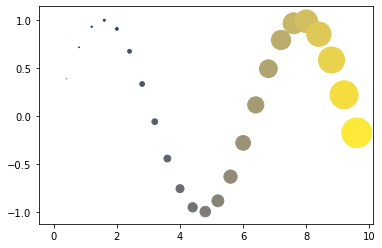

In [43]:
x = np.arange(0, 10, 0.4)
y = np.sin(x)
area = x**3
colors = x 
plt.scatter(x, y, c = colors, s = area, cmap = plt.cm.cividis)
plt.show()

Мы кратко обсудили лишь некоторые возможности библиотеки `matplotlib`. Кому интересно, стоит посмотреть документацию по `matplotlib`, а также заглянуть в галерею с примерами графиков, которые можно адаптировать под свои задачи и данные.